<a href="https://colab.research.google.com/github/Himanshu0702/Machine-Learning/blob/main/Mobilenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
pip install image


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
import numpy as np
import cv2
import PIL
import PIL.Image as Image
import os
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [8]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

In [9]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

In [10]:
data_dir = '/content/drive/MyDrive/Skin_Disease'

In [11]:
import pathlib 
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('/content/drive/MyDrive/Skin_Disease')

In [12]:
list(data_dir.glob('*/*.jpg'))[:4]

[PosixPath('/content/drive/MyDrive/Skin_Disease/Melanoma Skin Cancer Nevi and Moles/atypical-nevi-dermoscopy-98.jpg'),
 PosixPath('/content/drive/MyDrive/Skin_Disease/Melanoma Skin Cancer Nevi and Moles/congenital-nevus-27.jpg'),
 PosixPath('/content/drive/MyDrive/Skin_Disease/Melanoma Skin Cancer Nevi and Moles/congenital-nevus-32.jpg'),
 PosixPath('/content/drive/MyDrive/Skin_Disease/Melanoma Skin Cancer Nevi and Moles/atypical-nevi-26.jpg')]

In [13]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3592


In [14]:
Melanoma = list(data_dir.glob('Melanoma Skin Cancer Nevi and Moles/*'))
Melanoma[:5]

[PosixPath('/content/drive/MyDrive/Skin_Disease/Melanoma Skin Cancer Nevi and Moles/atypical-nevi-dermoscopy-98.jpg'),
 PosixPath('/content/drive/MyDrive/Skin_Disease/Melanoma Skin Cancer Nevi and Moles/congenital-nevus-27.jpg'),
 PosixPath('/content/drive/MyDrive/Skin_Disease/Melanoma Skin Cancer Nevi and Moles/congenital-nevus-32.jpg'),
 PosixPath('/content/drive/MyDrive/Skin_Disease/Melanoma Skin Cancer Nevi and Moles/atypical-nevi-26.jpg'),
 PosixPath('/content/drive/MyDrive/Skin_Disease/Melanoma Skin Cancer Nevi and Moles/congenital-nevus-55.jpg')]

In [15]:
diseases_images_dict = {
    'Melanoma' : list(data_dir.glob('Melanoma Skin Cancer Nevi and Moles/*')),
    'Eczema' : list(data_dir.glob('Eczema Photos/*')),
    'Dermatitis' : list(data_dir.glob('Atopic Dermatitis Photos/*')),
    'Psoriasis' : list(data_dir.glob('Psoriasis pictures Lichen Planus and related diseases/*')),
}

In [16]:
diseases_images_dict['Melanoma']

[PosixPath('/content/drive/MyDrive/Skin_Disease/Melanoma Skin Cancer Nevi and Moles/atypical-nevi-dermoscopy-98.jpg'),
 PosixPath('/content/drive/MyDrive/Skin_Disease/Melanoma Skin Cancer Nevi and Moles/congenital-nevus-27.jpg'),
 PosixPath('/content/drive/MyDrive/Skin_Disease/Melanoma Skin Cancer Nevi and Moles/congenital-nevus-32.jpg'),
 PosixPath('/content/drive/MyDrive/Skin_Disease/Melanoma Skin Cancer Nevi and Moles/atypical-nevi-26.jpg'),
 PosixPath('/content/drive/MyDrive/Skin_Disease/Melanoma Skin Cancer Nevi and Moles/congenital-nevus-55.jpg'),
 PosixPath('/content/drive/MyDrive/Skin_Disease/Melanoma Skin Cancer Nevi and Moles/atypical-nevi-44.jpg'),
 PosixPath('/content/drive/MyDrive/Skin_Disease/Melanoma Skin Cancer Nevi and Moles/atypical-nevi-trunk-10.jpg'),
 PosixPath('/content/drive/MyDrive/Skin_Disease/Melanoma Skin Cancer Nevi and Moles/atypical-nevi-dermoscopy-79.jpg'),
 PosixPath('/content/drive/MyDrive/Skin_Disease/Melanoma Skin Cancer Nevi and Moles/atypical-nevi-4

In [17]:
diseases_labels_dict = {
    'Melanoma' : 0,
    'Eczema' : 1,
    'Dermatitis': 2,
    'Psoriasis': 3,
}

In [18]:
img = cv2.imread(str(diseases_images_dict['Melanoma'][1]))
img.shape

(464, 720, 3)

In [19]:
cv2.resize(img,IMAGE_SHAPE).shape

(224, 224, 3)

In [20]:
X, y = [], []

for disease_name, images in diseases_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(diseases_labels_dict[disease_name])

In [21]:
X = np.array(X)
y = np.array(y)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [23]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

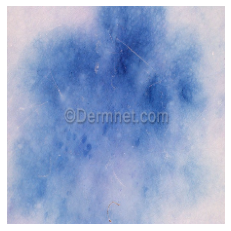

In [24]:
plt.axis('off')
plt.imshow(X[0])

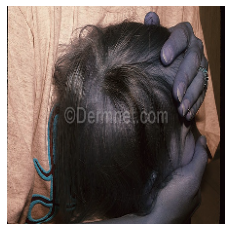

In [25]:
plt.axis('off')
plt.imshow(X[1])

In [26]:
predicted = classifier.predict(np.array([X[0],X[1],X[2]]))
predicted = np.argmax(predicted, axis=1)
predicted

1/1 [==============================] - 1s 509ms/step


array([795, 795, 795])

In [54]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224,224,3), trainable=False)


In [55]:
num_of_disease = 4

model = tf.keras.Sequential([
    pretrained_model_without_top_layer,
    tf.keras.layers.Dense(num_of_disease)
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_3 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_2 (Dense)             (None, 4)                 5124      
                                                                 
Total params: 2,263,108
Trainable params: 5,124
Non-trainable params: 2,257,984
_________________________________________________________________


In [56]:
model.compile(
    optimizer = "adam",
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['acc'])

model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
85/85 [==============================] - 52s 582ms/step - loss: 1.1245 - acc: 0.5122
Epoch 2/5
85/85 [==============================] - 52s 611ms/step - loss: 0.8889 - acc: 0.6136
Epoch 3/5
85/85 [==============================] - 54s 634ms/step - loss: 0.8097 - acc: 0.6552
Epoch 4/5
85/85 [==============================] - 49s 579ms/step - loss: 0.7441 - acc: 0.6915
Epoch 5/5
85/85 [==============================] - 49s 578ms/step - loss: 0.7055 - acc: 0.7079


In [57]:
model.evaluate(X_test_scaled, y_test)

29/29 [==============================] - 17s 577ms/step - loss: 0.8508 - acc: 0.6392


[0.8508267402648926, 0.6391982436180115]

In [66]:
import matplotlib.pyplot as plt
import cv2

In [ ]:
img = cv2.imread('/content/drive/MyDrive/dataset/val/Atopic Dermatitis Photos/05Atopic03290446.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show

In [ ]:
resize = tf.image.resize(img, (224,224))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [69]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 427ms/step


In [70]:
yhat

array([[-1.5555396 ,  0.7162686 ,  1.0131145 , -0.06347389]],
      dtype=float32)